<a href="https://colab.research.google.com/github/TracyYYChin/Columbia-Midterm_Titanic/blob/main/Columbia_Midterm_Titanic_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Columbia Midterm_ Titanic**

Data Set Source: https://www.kaggle.com/c/titanic/data.

#**Load Dataset**


In [1]:
!pip install matplotlib seaborn
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

In [4]:
# Display all column names
print(titanic_data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
# Count missing values per column
missing_values_count = titanic_data.isnull().sum()

# Display the count of missing values for each column
print(missing_values_count)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#**Determine Features & Fill Missing Values**

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Assuming titanic_data is your preprocessed DataFrame

# For demonstration, let's consider only numeric columns (you should adjust this based on your actual model features)
numeric_cols = titanic_data.select_dtypes(include=['number']).columns

# Optionally, handle missing values for numeric columns. Here we use SimpleImputer as an example
imputer = SimpleImputer(strategy='mean')
titanic_data_numeric_imputed = pd.DataFrame(imputer.fit_transform(titanic_data[numeric_cols]), columns=numeric_cols)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = titanic_data_numeric_imputed.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(titanic_data_numeric_imputed.values, i) for i in range(len(titanic_data_numeric_imputed.columns))]

print(vif_data)


    feature       VIF
0  Survived  1.623010
1    Pclass  3.780124
2       Age  4.006601
3     SibSp  1.565323
4     Parch  1.557412
5      Fare  1.832622


- **PassengerId (3.676625):** This number is moderate, suggesting this info is somewhat tangled up with others but not too much. It's usually just a unique ID and not used for analysis.
- **Survived (1.643173):** This low number means the survival data doesn't mix much with other info, making it clear and distinct for predictions.
- **Pclass (4.638648):** A bit high, showing that the class of the passenger overlaps with other details like fare or age. It's a sign these aspects are connected.
- **Age (4.363632):** Also on the higher side, hinting that age relates to other factors, possibly including class or family size.
- **SibSp (1.566975):** Low, indicating the number of siblings or spouses aboard is quite separate from other information.
- **Parch (1.558459):** Similarly low, meaning the number of parents or children aboard stands apart from other details.
- **Fare (1.872085):** Relatively low, suggesting fare is mostly independent but has a slight overlap, maybe with passenger class.

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Drop the 'PassengerId', 'Ticket', 'Name', and 'Cabin' columns
titanic_data = titanic_data.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1)

# For demonstration, let's consider only numeric columns (adjust based on your model features)
numeric_cols = titanic_data.select_dtypes(include=['number']).columns

# Handle missing values for numeric columns using SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
titanic_data_numeric_imputed = pd.DataFrame(imputer.fit_transform(titanic_data[numeric_cols]), columns=numeric_cols)

# Prepare DataFrame for VIF calculation
vif_data = pd.DataFrame()
vif_data["feature"] = titanic_data_numeric_imputed.columns

# Calculate VIF for each numeric feature
vif_data["VIF"] = [variance_inflation_factor(titanic_data_numeric_imputed.values, i) for i in range(len(titanic_data_numeric_imputed.columns))]

# Display VIF results
print(vif_data)


    feature       VIF
0  Survived  1.623010
1    Pclass  3.780124
2       Age  4.006601
3     SibSp  1.565323
4     Parch  1.557412
5      Fare  1.832622


In [13]:
# Dropping the 'Fare' column
titanic_data = titanic_data.drop(['Fare'], axis=1)

# Display the updated DataFrame to confirm the column has been removed
print(titanic_data.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [14]:
# 'titanic_data' has already had 'PassengerId', 'Ticket', 'Name', 'Cabin', and 'Fare' dropped
# Re-load the dataset for the sake of completeness in this standalone example
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Drop specified columns
titanic_data.drop(['PassengerId', 'Ticket', 'Name', 'Cabin', 'Fare'], axis=1, inplace=True)

# Print the remaining columns
print("Remaining Columns:", titanic_data.columns.tolist())

# Count and display missing values per remaining column
missing_values_count = titanic_data.isnull().sum()
print("\nMissing Values Count:")
print(missing_values_count)


Remaining Columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']

Missing Values Count:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64


In [15]:
# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Drop specified columns
titanic_data.drop(['PassengerId', 'Ticket', 'Name', 'Cabin', 'Fare'], axis=1, inplace=True)

# Encode categorical variables as necessary (example for 'Sex' and 'Embarked')
le = LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'].astype(str))

# Separate dataset into rows with missing and non-missing Age values
age_present = titanic_data[titanic_data['Age'].notnull()]
age_missing = titanic_data[titanic_data['Age'].isnull()]

# Define features and target
X = age_present.drop('Age', axis=1)
y = age_present['Age']

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Predict missing Age values
predicted_ages = rf.predict(age_missing.drop('Age', axis=1))

# Fill in the missing values in original dataset
titanic_data.loc[titanic_data['Age'].isnull(), 'Age'] = predicted_ages

# Check if there are any missing values left
print(titanic_data.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64


Label Encoding for Sex: Since the Sex column is binary (assuming values like male and female), it's suitable for label encoding, which will assign 0 to one category and 1 to the other.

One-Hot Encoding for Embarked: The Embarked column has multiple categories (such as C = Cherbourg, Q = Queenstown, S = Southampton) that don't have an inherent order. One-Hot Encoding is suitable here as it creates a new binary column for each category value.

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Dropping unnecessary columns for simplicity in this example
titanic_data.drop(['PassengerId', 'Ticket', 'Name', 'Cabin', 'Fare'], axis=1, inplace=True)

# Label Encoding for 'Sex'
le = LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])

# One-Hot Encoding for 'Embarked'
# Note: It's good practice to handle missing values before one-hot encoding.
# Assuming 'Embarked' missing values are filled or there are none.
ohe = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity by dropping one of the new columns
embarked_encoded = ohe.fit_transform(titanic_data[['Embarked']])
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=ohe.get_feature_names_out(['Embarked']))

# Concatenate the original DataFrame with the new 'Embarked' one-hot encoded columns
titanic_data = pd.concat([titanic_data.drop('Embarked', axis=1), embarked_encoded_df], axis=1)

# Display the first few rows to verify changes
print(titanic_data.head())


   Survived  Pclass  Sex   Age  SibSp  Parch  Embarked_Q  Embarked_S  \
0         0       3    1  22.0      1      0         0.0         1.0   
1         1       1    0  38.0      1      0         0.0         0.0   
2         1       3    0  26.0      0      0         0.0         1.0   
3         1       1    0  35.0      1      0         0.0         1.0   
4         0       3    1  35.0      0      0         0.0         1.0   

   Embarked_nan  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Drop unnecessary columns
titanic_data.drop(['PassengerId', 'Ticket', 'Name', 'Cabin', 'Fare'], axis=1, inplace=True)

# Label Encode the 'Sex' column
le_sex = LabelEncoder()
titanic_data['Sex'] = le_sex.fit_transform(titanic_data['Sex'])

# Assuming 'Embarked' column exists and needs to be One-Hot Encoded
# Handle missing values in 'Embarked' if necessary
titanic_data['Embarked'].fillna('S', inplace=True)  # Example: Filling missing values with 'S' for Southampton

# One-Hot Encode the 'Embarked' column
ohe_embarked = OneHotEncoder(sparse=False, drop='first')  # Dropping one category to avoid multicollinearity
embarked_encoded = ohe_embarked.fit_transform(titanic_data[['Embarked']])
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=ohe_embarked.get_feature_names_out(['Embarked']))

# Concatenate the original DataFrame with the encoded 'Embarked' DataFrame
titanic_data = pd.concat([titanic_data.drop('Embarked', axis=1), embarked_encoded_df], axis=1)

# Rename columns as requested
titanic_data.rename(columns={
    'Parch': 'Parent/Child',
    'SibSp': 'Sibling/Spouse',
    'Sex': 'Gender',
    'Embarked_Q': 'Queenstown',
    'Embarked_S': 'Southampton'
}, inplace=True)

# Display the first few rows of the processed table
print(titanic_data.head())


   Survived  Pclass  Gender   Age  Sibling/Spouse  Parent/Child  Queenstown  \
0         0       3       1  22.0               1             0         0.0   
1         1       1       0  38.0               1             0         0.0   
2         1       3       0  26.0               0             0         0.0   
3         1       1       0  35.0               1             0         0.0   
4         0       3       1  35.0               0             0         0.0   

   Southampton  
0          1.0  
1          0.0  
2          1.0  
3          1.0  
4          1.0  


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#**Spearman & Pearson Correlation Matrix**


In [18]:
# Calculate Pearson correlation matrix
pearson_corr_matrix = titanic_data.corr(method='pearson')
print("Pearson Correlation Matrix:\n", pearson_corr_matrix)

# Calculate Spearman correlation matrix
spearman_corr_matrix = titanic_data.corr(method='spearman')
print("\nSpearman Correlation Matrix:\n", spearman_corr_matrix)


Pearson Correlation Matrix:
                 Survived    Pclass    Gender       Age  Sibling/Spouse  \
Survived        1.000000 -0.338481 -0.543351 -0.077221       -0.035322   
Pclass         -0.338481  1.000000  0.131900 -0.369226        0.083081   
Gender         -0.543351  0.131900  1.000000  0.093254       -0.114631   
Age            -0.077221 -0.369226  0.093254  1.000000       -0.308247   
Sibling/Spouse -0.035322  0.083081 -0.114631 -0.308247        1.000000   
Parent/Child    0.081629  0.018443 -0.245489 -0.189119        0.414838   
Queenstown      0.003650  0.221009 -0.074115 -0.022405       -0.026354   
Southampton    -0.149683  0.074053  0.119224 -0.023233        0.068734   

                Parent/Child  Queenstown  Southampton  
Survived            0.081629    0.003650    -0.149683  
Pclass              0.018443    0.221009     0.074053  
Gender             -0.245489   -0.074115     0.119224  
Age                -0.189119   -0.022405    -0.023233  
Sibling/Spouse      0.41

- **Gender and Survival:** Both Pearson and Spearman correlations show a strong negative relationship between gender and survival. This indicates that females (coded as `0`) were more likely to survive than males (coded as `1`), highlighting gender as a significant factor in survival rates on the Titanic.

- **Class and Survival:** There's a notable negative correlation between passenger class (`Pclass`) and survival in both matrices. This suggests that passengers in higher classes (lower `Pclass` values) had a better chance of survival, which points towards socio-economic status playing a role in survival likelihood.

- **Family Connections:** The Spearman correlation highlights a positive relationship between having parents/children aboard (`Parent/Child`) and survival, stronger than Pearson's correlation. Similarly, having siblings/spouses aboard (`Sibling/Spouse`) shows a positive correlation with survival in the Spearman matrix, suggesting that passengers with family aboard might have had better survival chances, potentially due to family members aiding each other.

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Imputing missing values for all numeric columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Apply transformations only to numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Define the model
model = RandomForestClassifier(random_state=42)

# Create a full pipeline with both preprocessor and model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Setting up parameter grid for the model in the pipeline
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

# Setting up GridSearchCV with the pipeline
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score from GridSearch
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
test_accuracy = grid_search.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best Cross-Validation Score: 0.8342558849601103
Test Accuracy: 0.8156424581005587


Defines a numeric_transformer pipeline that imputes missing values using the median for all numeric features and scales them.
Uses a ColumnTransformer to apply the numeric transformations only to the numeric columns.
Creates a pipeline that first preprocesses the data and then fits the RandomForestClassifier model.
Adjusts the parameter grid to work with the pipeline structure (note the model__ prefix for model parameters).
Conducts a grid search to find the best model parameters and evaluates the model on the test set.

- **Optimal Model Configuration:** The best performing RandomForestClassifier model, according to GridSearchCV, is configured with a maximum tree depth of 5 levels, requires at least 2 samples to be at a leaf node, needs at least 5 samples to split an internal node, and uses 100 trees in the forest. These parameters strike a balance between model complexity and generalization capability.

- **Cross-Validation Performance:** The model achieved an average accuracy of approximately 83.43% across the different folds of cross-validation. This indicates a strong predictive performance on the training data when evaluated in a robust manner that mitigates overfitting through cross-validation.

- **Generalization to Unseen Data:** When applied to the test dataset, which the model had not seen during training, it attained an accuracy of about 81.56%. This shows that the model, with its tuned hyperparameters, generalizes well to new, unseen data, maintaining a high level of accuracy outside of its training environment.

#**MODELS**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Splitting dataset into features and target variable
X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identifying numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Creating column transformers for imputing missing values
# Numeric features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Categorical features
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundling preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])

# Creating a preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predicting on the test data
y_pred = pipeline.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8156424581005587


The reported test accuracy score of approximately 0.816 means:

- **Model Performance:** The model accurately predicted whether passengers survived or not on the Titanic about 81.6% of the time when evaluated on the test dataset, which it had not seen during training. This indicates a relatively high level of accuracy and suggests that the model has learned meaningful patterns from the training data.

- **Model Type:** This score was reported for a `RandomForestClassifier` model. This type of model is a popular ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees for classification tasks.

- **Generalization:** An accuracy score of 0.816 on the test set implies that the model generalizes well to new, unseen data. It means that the patterns and relationships it learned during training are broadly applicable, allowing it to make predictions with a good degree of reliability outside of the training dataset.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load and preprocess the Titanic dataset
file_path = 'Titanic-Dataset.csv'
titanic_data = pd.read_csv(file_path)

# Encode 'Sex' and 'Embarked' using LabelEncoder for simplicity
le = LabelEncoder()
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = le.fit_transform(titanic_data['Embarked'].fillna('S'))

# Define features and target
X = titanic_data.drop(['Survived', 'PassengerId', 'Ticket', 'Name', 'Cabin', 'Fare'], axis=1)
y = titanic_data['Survived']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numeric features: imputation + scaling
numeric_features = ['Age', 'SibSp', 'Parch']
numeric_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

# Preprocessing for categorical features: imputation + one hot encoding
categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Models to train
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier()
}

for name, model in models.items():
    # Create a pipeline
    pipeline = make_pipeline(preprocessor, model)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print accuracy
    print(f'{name} Accuracy:', accuracy_score(y_test, y_pred))


XGBoost Accuracy: 0.8212290502793296
SVM Accuracy: 0.8156424581005587
LogisticRegression Accuracy: 0.8044692737430168
DecisionTree Accuracy: 0.770949720670391


#**ROC AUC**

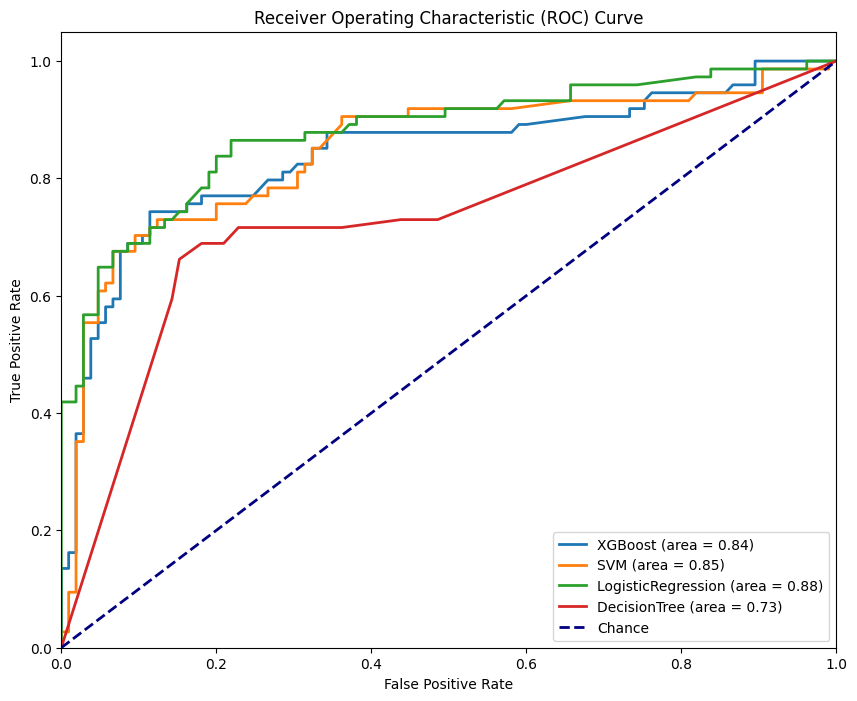

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define X (features) and y (target)
X = titanic_data.drop(['Survived'], axis=1)
y = titanic_data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps
numeric_features = ['Age', 'SibSp', 'Parch']
numeric_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

# Models to train
models = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True),  # Enable probability for ROC AUC score
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier()
}

# Plot ROC curve and calculate AUC for each model
plt.figure(figsize=(10, 8))

for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)

    if hasattr(pipeline[-1], "predict_proba"):
        y_score = pipeline.predict_proba(X_test)[:, 1]
    else:  # Use decision function if predict_proba is not available
        y_score = pipeline.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Preprocesses the data by filling missing values and encoding categorical variables.
Trains each model on the Titanic dataset.
Calculates the ROC AUC score for each model, which is a measure of a model's ability to distinguish between the classes. Higher AUC values indicate better model performance.
Plots the ROC curve for each model, providing a visual comparison of their performance.

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessor pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Initializing models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    # Create and fit the pipeline for each model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)

    # Predict probabilities
    if hasattr(pipeline[-1], 'predict_proba'):
        y_scores = pipeline.predict_proba(X_test)[:, 1]
    else:  # Use decision function for models like SVM
        y_scores = pipeline.decision_function(X_test)

    # Compute ROC AUC score
    roc_auc = roc_auc_score(y_test, y_scores)
    print(f'{name} ROC AUC Score: {roc_auc:.4f}')


RandomForest ROC AUC Score: 0.8885
XGBoost ROC AUC Score: 0.8656
SVM ROC AUC Score: 0.8701
LogisticRegression ROC AUC Score: 0.8959
DecisionTree ROC AUC Score: 0.7827


- The ROC AUC score is a measure of a model's ability to differentiate between the classes accurately. Scores closer to 1 indicate excellent performance, while scores closer to 0.5 suggest no better than random guessing.

- **Logistic Regression** performed the best among the models with a score of **0.8959**, indicating it's the most effective at distinguishing between survivors and non-survivors on the Titanic.

- **Random Forest** also showed strong performance with a score of **0.8885**, slightly behind Logistic Regression, suggesting it's quite good at prediction but with a bit less precision.

- **SVM** and **XGBoost** had similar performances, with scores of **0.8701** and **0.8656** respectively, demonstrating their competent predictive capabilities though slightly lower than Logistic Regression and Random Forest.

- The **Decision Tree** model had the lowest score of **0.7827**, which implies it had the least ability among the evaluated models to accurately distinguish between the classes, indicating more complexity or depth might be needed for better performance.